# CS4465 Open Project

Name: Ritvik Raina

Student ID: 55828826

Custom CNN for COVID detection

In [47]:
#import relevant packagaes
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, image as img
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns


from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.models import Sequential

In [2]:
#load data
path = "/Users/ritvikraina/Library/Mobile Documents/com~apple~CloudDocs/College/Courses/CS4465 Bioinformatics/Project/data/dataset3"

Classes = ["Covid","Normal"]

covid_img = np.load(os.path.join(path,"Covid Images Array.npy")) #load the numpy array of images
normal_img = np.load(os.path.join(path,"Normal Images Array.npy"))

In [3]:
# To visualize the dataset
num_normal = len(normal_img)
num_covid = len(covid_img)

print("Training Set:")
print("Number of Normal Lung X-rays: {}".format(num_normal))
print("Number of Lung X-rays with COVID: {}".format(num_covid))
print("Total number of images: {}".format(num_normal+num_covid))

Training Set:
Number of Normal Lung X-rays: 6893
Number of Lung X-rays with COVID: 7593
Total number of images: 14486


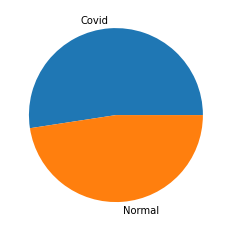

In [4]:
#vizualize the distribution
plt.pie(np.array([num_covid,num_normal]),labels=Classes)
plt.show()

#almost balaneced dataset

In [5]:
#define some variables
BATCH = 16
img_size = 128
epochs = 20

In [6]:
#Covid - 1
#Normal - 0

c_copy = covid_img
c_labels = ["1" for i in c_copy]
n_copy = normal_img
n_labels = ["0" for i in n_copy]


x = np.concatenate([c_copy, n_copy])
y = np.array((c_labels + n_labels), dtype=np.float32)
print(x.shape)
print(y.shape)

(14486, 128, 128, 1)
(14486,)


In [7]:
# CNN model

cnn = Sequential([
    Conv2D(32,kernel_size=5,activation="relu",input_shape=(img_size, img_size, 1)),
    BatchNormalization(),
    MaxPool2D(),
    
    Conv2D(64, kernel_size=5, activation="relu"),
    BatchNormalization(),
    MaxPool2D(),
    
    Conv2D(128, kernel_size=5, activation="relu"),
    BatchNormalization(),
    MaxPool2D(),
    
    Conv2D(256, kernel_size=5, activation="relu"),
    BatchNormalization(),
    MaxPool2D(),
    
    Flatten(),
    Dense(100,activation="relu"),
    Dropout(0.2),
    Dense(2,activation="sigmoid")
    
])

Metal device set to: Apple M1


2022-04-12 15:04:20.832961: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-12 15:04:20.833700: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 124, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       2

In [9]:
#callback to save the best weights of the model during training
checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_dir,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True)

cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

In [10]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [11]:
#training the model
history = cnn.fit(x_train, y_train,
                  epochs=epochs,
                  batch_size=BATCH,
                  callbacks=[checkpoint],
                  workers=4, 
                  validation_data=(x_test, y_test))

2022-04-12 15:04:39.201367: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-12 15:04:39.206018: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-04-12 15:04:39.496816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


725/725 [==============================] - ETA: 0s - loss: 0.4405 - accuracy: 0.8259

2022-04-12 15:05:24.407485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


725/725 [==============================] - 48s 66ms/step - loss: 0.4405 - accuracy: 0.8259 - val_loss: 0.3340 - val_accuracy: 0.8623
Epoch 2/20
725/725 [==============================] - 48s 67ms/step - loss: 0.3101 - accuracy: 0.8703 - val_loss: 0.3140 - val_accuracy: 0.8665
Epoch 3/20
725/725 [==============================] - 53s 73ms/step - loss: 0.2449 - accuracy: 0.8971 - val_loss: 1.2872 - val_accuracy: 0.6335
Epoch 4/20
725/725 [==============================] - 59s 81ms/step - loss: 0.2006 - accuracy: 0.9173 - val_loss: 0.1745 - val_accuracy: 0.9348
Epoch 5/20
725/725 [==============================] - 60s 83ms/step - loss: 0.1618 - accuracy: 0.9339 - val_loss: 0.1454 - val_accuracy: 0.9396
Epoch 6/20
725/725 [==============================] - 56s 77ms/step - loss: 0.1503 - accuracy: 0.9382 - val_loss: 0.4817 - val_accuracy: 0.8154
Epoch 7/20
725/725 [==============================] - 60s 82ms/step - loss: 0.1058 - accuracy: 0.9575 - val_loss: 0.1246 - val_accuracy: 0.9541
Epo

In [12]:
# save the model 
model_path = "CNN-trained.h5"
cnn.save(model_path)

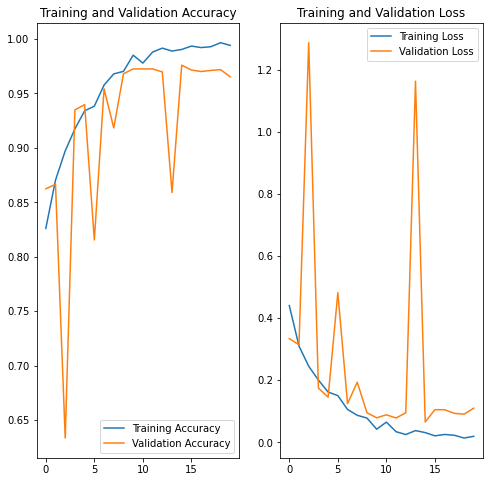

In [13]:
#VISUALIZE the training accuracy and loss over the epochs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
cnn.load_weights(checkpoint_dir) #load best weights of model

#model accuracy
y_pred = cnn.predict(x_test)
predicted = np.argmax(y_pred, axis=-1)
accuracy = np.equal(y_test, predicted).mean()
print("Accuracy:", accuracy)

2022-04-12 15:27:00.715362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 0.9758454106280193


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicted)) #evaluation

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1364
         1.0       0.98      0.98      0.98      1534

    accuracy                           0.98      2898
   macro avg       0.98      0.98      0.98      2898
weighted avg       0.98      0.98      0.98      2898



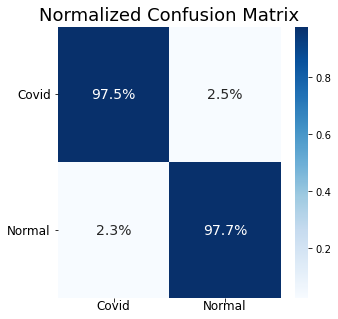

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, predicted, normalize='true'),
            fmt='.1%',
            annot=True,
            cmap="Blues",
            xticklabels=["Covid","Normal"],
            yticklabels=["Covid","Normal"],
            annot_kws={"size": 14})
plt.title('Normalized Confusion Matrix', {'fontsize':18})
plt.yticks(np.arange(2)+0.5,rotation=0, fontsize="12", va="center")
plt.xticks(np.arange(2)+0.5,rotation=0, fontsize="12", va="center")
plt.show()

In [22]:
#Grad-CAM to visualize what the model observes

#code taken from
#https://towardsdatascience.com/understand-your-algorithm-with-grad-cam-d3b62fce353

import cv2
from tensorflow.keras.models import Model

def GradCam(model, img_array, layer_name, eps=1e-8):
    '''
    Creates a grad-cam heatmap given a model and a layer name contained with that model
    

    Args:
      model: tf model
      img_array: (img_width x img_width) numpy array
      layer_name: str


    Returns 
      uint8 numpy array with shape (img_height, img_width)

    '''

    gradModel = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output,
                 model.output])
    
    with tf.GradientTape() as tape:
        # cast the image tensor to a float-32 data type, pass the
        # image through the gradient model, and grab the loss
        # associated with the specific class index
        inputs = tf.cast(img_array, tf.float32)
        (convOutputs, predictions) = gradModel(inputs)
        loss = predictions[:, 0]
        # use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)
    
    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads
    
    # the convolution and guided gradients have a batch dimension
    # (which we don't need) so let's grab the volume itself and
    # discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]
    
    # compute the average of the gradient values, and using them
    # as weights, compute the ponderation of the filters with
    # respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
  
    # grab the spatial dimensions of the input image and resize
    # the output class activation map to match the input image
    # dimensions
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))
    
    # normalize the heatmap such that all values lie in the range
    # [0, 1], scale the resulting values to the range [0, 255],
    # and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    
    # heatmap = (heatmap * 255).astype("uint8")
    # return the resulting heatmap to the calling function
    return heatmap


def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x-b)))

def superimpose(img_bgr, cam, thresh, emphasize=False):
    
    '''
    Superimposes a grad-cam heatmap onto an image for model interpretation and visualization.
    

    Args:
      image: (img_width x img_height x 3) numpy array
      grad-cam heatmap: (img_width x img_width) numpy array
      threshold: float
      emphasize: boolean

    Returns 
      uint8 numpy array with shape (img_height, img_width, 3)

    '''
    heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
    if emphasize:
        heatmap = sigmoid(heatmap, 50, thresh, 1)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    hif = .8
    superimposed_img = heatmap * hif + img_bgr
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return superimposed_img_rgb

In [60]:
rand = np.random.choice(range(0,11588)) #choose a random number

Label:Normal


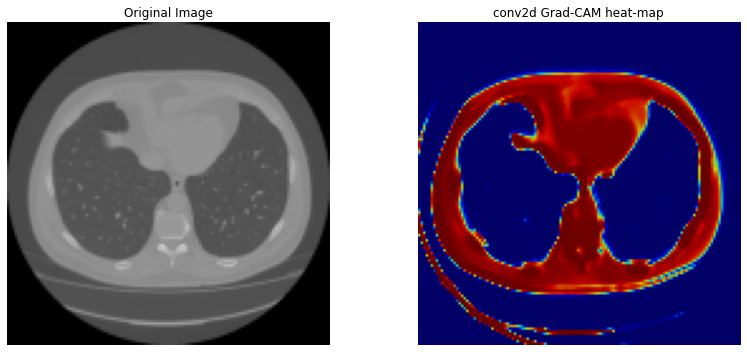

In [63]:
## Grad-CAM heatmap for convolutional layer in the cnn

img=x_train[rand]
label=y_train[rand]

if label == 0.0:
    label = "Normal"
else:
    label = "Covid"

layer_name = 'conv2d'
grad_cam=GradCam(cnn,np.expand_dims(img, axis=0),layer_name)
grad_cam_superimposed = superimpose(img, grad_cam, 0.5, emphasize=True)


plt.figure(figsize=(12, 5))
print(f"Label:{label}")
ax = plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
ax = plt.subplot(1, 2, 2)
plt.imshow(grad_cam_superimposed)
plt.axis('off')
plt.title('conv2d Grad-CAM heat-map')
plt.tight_layout()